# 1_import the dataset 


In [16]:
#import the required libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [17]:
#read the dataset
df = pd.read_csv(r"C:\\Users\\almostashar\\Downloads\\heart disease dataset.csv",delimiter=",")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Variables or features explanations:
age (Age in years)

sex : (1 = male, 0 = female)

cp (Chest Pain Type): [0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic]

trestbps (Resting Blood Pressure in mm/hg )

chol (Serum Cholesterol in mg/dl)

fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes]

restecg (Resting ECG): [0: normal, 1: having ST-T wave abnormality , 2: showing probable or definite left ventricular hypertrophy]

thalach (maximum heart rate achieved)

exang (Exercise Induced Angina): [1 = yes, 0 = no]

oldpeak (ST depression induced by exercise relative to rest)

slope (the slope of the peak exercise ST segment)

ca [number of major vessels (0–3)]

thal (Thallium heart scan): [1 = normal, 2 = fixed defect, 3 = reversible defect]

target: [0 = disease, 1 = no disease]



In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


As we can see that describe method show us some statistical matrics ,for instance The maximum value of age is 77 but for chol it is 564. Thus, feature scaling must be performed on the dataset.

In [20]:
#checking the null values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 2_understanding the data(Visualization+analyzing)

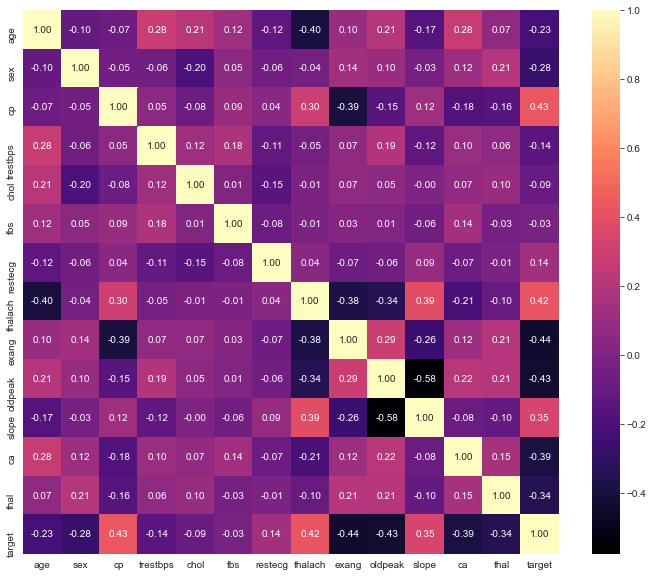

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

 Correlation Matrix with Heatmap — Correlation indicates how the features are related to each other or to the target variable.
some of the features have a negative correlation with the target value and some have positive,From this heatmap we can observe that the ‘cp’ chest pain is highly related to the target variable.

1_‘cp’, ‘thalach’, ‘slope’ shows good positive correlation with target.

2_‘oldpeak’, ‘exang’, ‘ca’, ‘thal’, ‘sex’, ‘age’ shows a good negative correlation with target.

3_‘fbs’ ‘chol’, ‘trestbps’, ‘restecg’ has low correlation with our target.

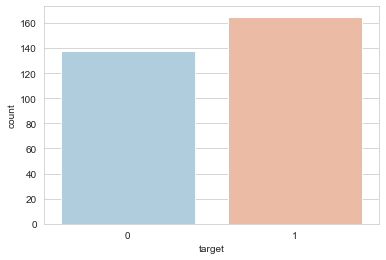

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')
plt.show()

Bar Plot for Target Class,It’s really essential that the dataset we are working on should be approximately balanced because 
imbalanced dataset can make the whole model training useless,so now From the plot, we can see that the classes are almost balanced.

1    165
0    138
Name: target, dtype: int64


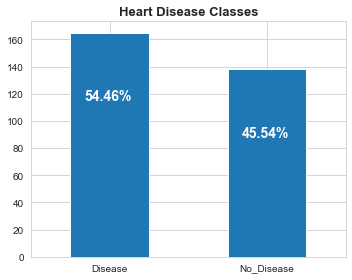

In [23]:
print(df.target.value_counts())

#df['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes') #Simple plot

fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No_Disease"]
ax = df.target.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()

target variable distribution,as we can see from this plot that There are more diseased than healthy patients.

Text(0.5, 1.0, 'Age Distribution')

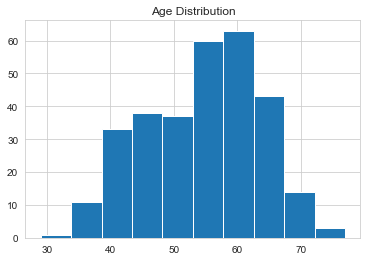

In [24]:
df.age.value_counts()
df["age"].hist().plot(kind="bar")
plt.title("Age Distribution")

here most of the patients are in the age between 50s to 60s,Heart Disease is very common in the seniors which is composed of age group 60 and above and common among adults which belong to the age group of 41 to 60. But it’s rare among the age group of 19 to 40 and very rare among the age group of 0 to 18.

1    207
0     96
Name: sex, dtype: int64


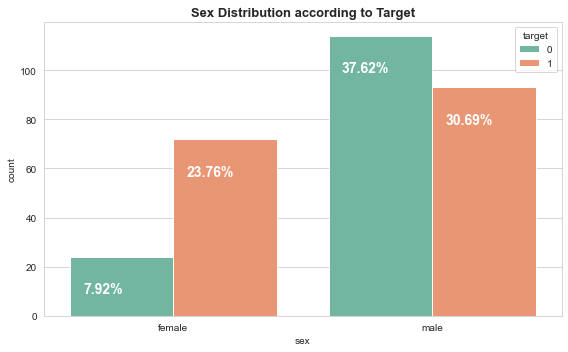

In [25]:
print(df.sex.value_counts())
fig, ax = plt.subplots(figsize=(8,5))
name =["female","male"] 
ax=sns.countplot(x="sex",hue="target",data=df,palette="Set2")
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name,rotation=0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

According to this(Cleveland dataset) males are more susceptible to get Heart Disease with a percentage of 37.62%  than females. Men experience heart attacks more than women.

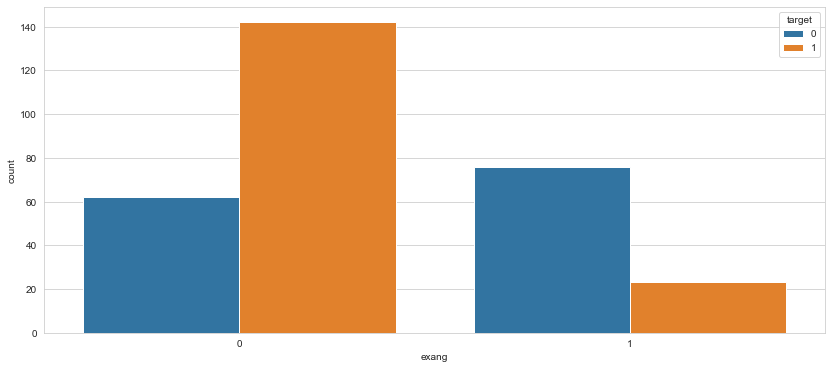

In [26]:
fig = plt.figure(figsize=(14,6))
sns.countplot(df["exang"], hue=df["target"])

here we want to see if there is a connection between exang (excersice induced angina) and the target,so Quite a lot people have a heart disease without having an exercise induced angina.

# 3_Data processing 

In [27]:
df = pd.get_dummies(df, columns = ['sex', 'cp', 
                                        'fbs','restecg', 
                                        'exang', 'slope', 
                                        'ca', 'thal'])
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


After exploring the data set,we need to convert some categorical variables into dummy variables  by using [get_dummies]method and scale all the values before training the Machine Learning models.

In [28]:
# splitting the dataset into training and testing 
y = df['target']
X = df.drop(['target'], axis = 1)
x_train,x_test,y_train,y_test= train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# 4_Machine learning algorithms 
 
 in this project i am going to use 3 algorithms,and varied their various parameters and compared the final models,so The task is to evaluate machine learning models to predict the absence/presence of heart disease.

# knn model

In [29]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

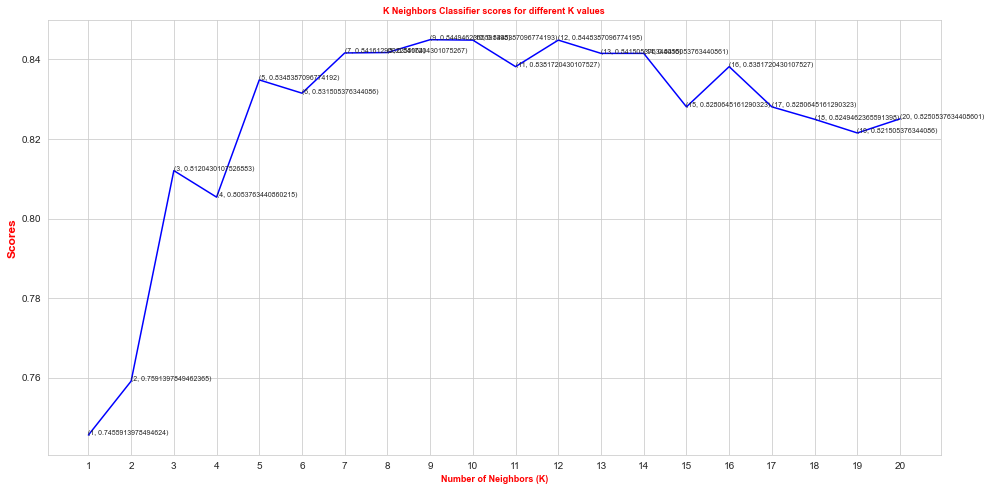

In [30]:
plt.figure(figsize=(16,8))
plt.plot([k for k in range(1,21)],knn_scores,color='blue')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]),fontsize=7)
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)',color='Red',weight='bold',fontsize='9')
plt.ylabel('Scores',color='Red',weight='bold',fontsize='12')
plt.title('K Neighbors Classifier scores for different K values',color='Red',weight='bold',fontsize='9')
plt.show()
plt.rcParams["font.weight"]= "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [31]:
#the accuracy for knn 
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.8448387096774195

# decision tree model

In [32]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(x_train, y_train)
    dt_scores.append(dt_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

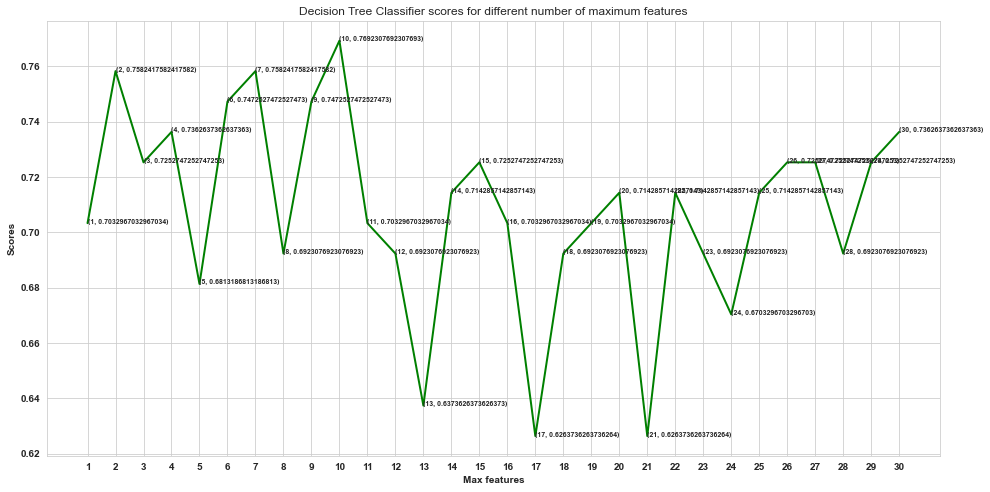

In [33]:
plt.figure(figsize=(16,8))
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green',linewidth=2)
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]),fontsize=7)
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

# random forest 

In [34]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(x_train, y_train)
    rf_scores.append(rf_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

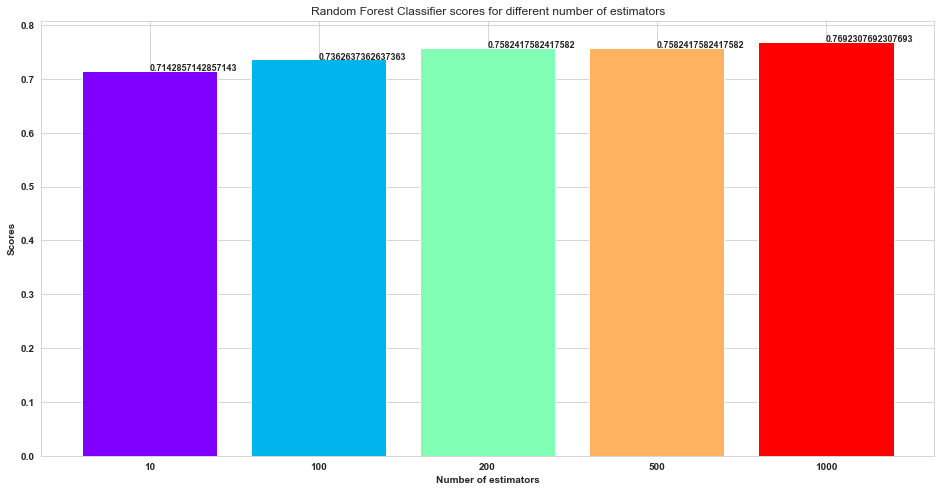

In [35]:
plt.figure(figsize=(16,8))
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i],fontsize=9)
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

Taking a look at the bar graph, we can see that the maximum score of 82% was achieved for 1000 trees.

In [38]:
#the accuracy of random forest
randomforest_classifier= RandomForestClassifier(n_estimators=1000)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
score.mean()

0.8247311827956988

# Conclusion:
The project involved analysis of the heart disease patient dataset with proper data processing. Then,3 models were trained and tested with maximum scores as follows:
K Neighbors Classifier: 84%

Decision Tree Classifier:more than 79%

Random Forest Classifier: 82%

K Neighbors Classifier scored the best score of 84% with 12neighbors.